<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/Montecarlo_Acierto_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO

Este método es bastane popular, debido a que tiene una interpretación geométrica.

**Consiste en interpretar la integral como el área bajo la
curva en una región rectangular**
$$\lbrace 0 \leq x \leq \rbrace \times \lbrace 0 \leq g(x) \leq c \rbrace$$

Siendo $c$ un valor que acote la función $g(x)$

Se generan $n$ puntos en la región.  
La probabilidad de que los puntos graficados se encuentren debajo de la función $g(x)$ está dada por
$$p=\frac{\int_a^b g(x)dx}{c(b-a)}=\frac{I}{c(b-a)}$$

Se utiliza el estimador $\hat{p}=\frac{n_{aciertos}}{n}$ con $n_{aciertos}$ el número de puntos debajo de la curva.

por lo tanto

$$p=\frac{I}{c(b-a)} \Rightarrow I=\hat{p}c(b-a) \hspace{5mm} \Rightarrow \hspace{5mm} I \approx \theta_2 =c(b-a) \frac{n_{aciertos}}{n}$$

El estimador $\hat{p}$ funciona debidp a que es un **estimador insesgado**:

Al tratarse un experimento de acierto y error, tiene una distribución Bernoulli, de modo que:

$$E(\theta_2) = c(b-a)E \bigg( \frac{n_{aciertos}}{n} \bigg)=pc(b-a)=I $$



# CÓDIGO

In [58]:
import numpy as np                        #Se cargan las librerías
import random as rnd
import matplotlib.pyplot as plt

In [59]:
def grafica (u1,u2,muestra):              #Esta función grafica la corrdenada en el plano
  if muestra==1:
    plt.scatter(u1,u2,color="red")        #Grafica un punto rojo si está debajo de la funicón
  else:
    plt.scatter(u1,u2,color="blue")       #Grafica un punto rojo si está debajo de la función
  return

In [60]:
def muestra(c):                          #Esta función devuelve 1 si la coordenada está debajo de la curva.
  n=0
  u1=rnd.random()                        #Coordenada del eje X
  u2=rnd.random()                        #Coordenada del eje Y
  if u2 <= np.sqrt(np.arctan(u1)):       #Condición de la muestra
        n+=1                             #Número de éxito +1
  grafica(u1,u2,n)
  return n

In [61]:
def muestra_sim(c):                      #Esta función se utiliza para la simulación, NO GRAFICA los puntos debajo de la curva
  global n
  n=0
  u1=rnd.random()                        #Coordenada del eje X
  u2=rnd.random()                        #Coordenada del eje Y
  if u2 <= np.sqrt(np.arctan(u1)):       #Condición de la muestra
        n+=1                             #Número de éxito +1
  return n

In [62]:
def estimacion_iter(N):                           #Esta función se utiliza para la simulación, NO GRAFICA los puntos debajo de la cur
  estimacion=[]
  iter=0                                    #No. de itercaiones
  for i in range(N):
    iter+=muestra_sim(np.sqrt(np.arctan(1)))
    estimacion.append(iter/(i+1))                #Guarda en una lista la estimación
  return np.mean(estimacion)                     #Devuelve la media de las estimaciones de cada experimento

In [63]:
def estimacion_iter_graf(N):                           #Grafica SOLO 1 experimento de Montecarlo
  estimacion=[]
  iter=0                                         #No. de itercaiones
  X=np.linspace(0,1,100)
  plt.plot(X,np.sqrt(np.arctan(X)))              #Grafica la función
  for i in range(N):
    iter+=muestra(np.sqrt(np.arctan(1)))
    estimacion.append(iter/(i+1))                      #Guarda en una lista la estimacion
  print(np.sqrt(np.arctan(1))*iter/N)
  return estimacion

0.553005601482521


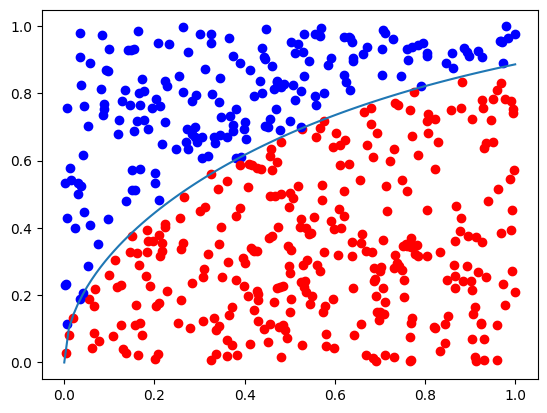

In [64]:
exp=estimacion_iter_graf(500)                 #Grafica solo 1 experimento con 500 iteraciones


In [65]:
def simulacion(M):          #Esta función es para realizar la simulación mediante varias corridas del experimento
  r=[]
  for i in range(M):
    R=estimacion_iter(50)        #Si la muestra en el experimento es chica, el número de corridas puede ser alto y viceversa
    r.append(R)
  return r

(array([ 1.,  0.,  1.,  2.,  1.,  5.,  5., 11., 11., 11., 16., 13., 27.,
        43., 28., 43., 41., 53., 40., 50., 63., 54., 66., 56., 53., 65.,
        42., 43., 29., 29., 22., 21., 16., 14., 14.,  4.,  1.,  1.,  3.,
         2.]),
 array([0.32843369, 0.34264439, 0.35685509, 0.37106579, 0.3852765 ,
        0.3994872 , 0.4136979 , 0.4279086 , 0.4421193 , 0.45633   ,
        0.4705407 , 0.4847514 , 0.4989621 , 0.5131728 , 0.52738351,
        0.54159421, 0.55580491, 0.57001561, 0.58422631, 0.59843701,
        0.61264771, 0.62685841, 0.64106911, 0.65527981, 0.66949052,
        0.68370122, 0.69791192, 0.71212262, 0.72633332, 0.74054402,
        0.75475472, 0.76896542, 0.78317612, 0.79738682, 0.81159753,
        0.82580823, 0.84001893, 0.85422963, 0.86844033, 0.88265103,
        0.89686173]),
 <BarContainer object of 40 artists>)

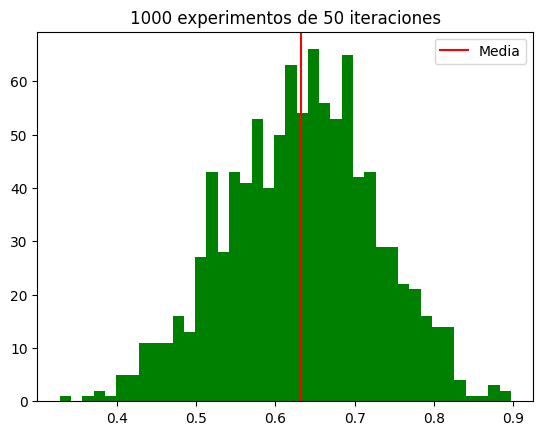

In [75]:
S=simulacion(1000)                    #Se simula el experimetno mediante n corridas
plt.title('1000 experimentos de 50 iteraciones')
plt.axvline(np.mean(S),label='Media',color='red')
plt.legend()
plt.hist(S,bins=40,color="green")    #Grafica el histograma de las estimaciones calculadas

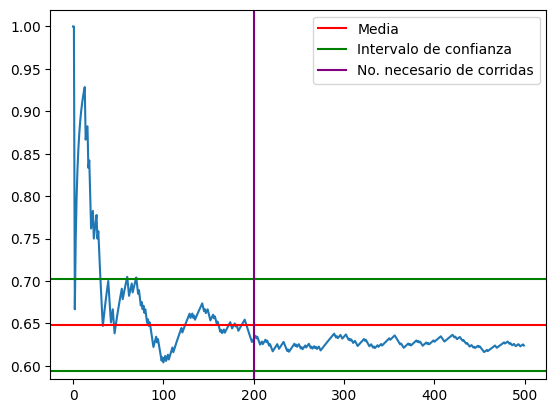

In [67]:
media=np.mean(exp)                                                     #Calcula la media de las probabilidades guardadas en la lista
var=np.std(exp)                                                        #Calcula la varianza de las probabilidades guardadas en la lista
plt.plot(exp)                                                          #Grafica las probabilidades gurdadas, se puede apreciar el estado transitorio y el estable
plt.axhline(media, color="red", label="Media")                         #Grafica la media calculada
plt.axhline(media+var,color="green", label="Intervalo de confianza")
plt.axhline( media-var, color="green")                                  #Crea un intervalo de confianza utilizando la media y varianza
plt.axvline(200, color="purple", label="No. necesario de corridas")     #A partir de 500 vueltas, la probabilidad comienza a estabilizarse
plt.legend()

In [56]:
print('Valor de la integral estimado:',np.mean(S))

Valor de la integral estimado: 0.6271829919018294
